In [36]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
from scipy import ndimage
from matplotlib import pyplot
import scipy
from PIL import Image
from skimage import morphology,draw
from tqdm import tqdm_notebook as tqdm
import math

# import image

In [1]:
cd E:\Siyan Zhou\mask\with_optical_image_whole

E:\Siyan Zhou\mask\with_optical_image_whole


In [3]:
f = Image.open("Mask_Segmentation_W_11-1 (8.16).vsseg_export_s0000"+".png")

In [4]:
im = np.asarray(f)

In [5]:
im.shape

(6736, 12482)

In [17]:
560%100

60

# 2D skeletonize and superimpose

In [21]:
skeleton = np.zeros((6736,12482),dtype = "uint8")

In [22]:
for i in tqdm(range(1416)):
    f = Image.open("Mask_Segmentation_W_11-1 (8.16).vsseg_export_s"+str("%04d"%i)+".png")
    im = (np.asarray(f) > 0)
    s = morphology.skeletonize(im)
    skeleton = skeleton + s
    if i%100 == 0:
        scipy.misc.imsave('topview'+str(i)+'.png', skeleton)

C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys


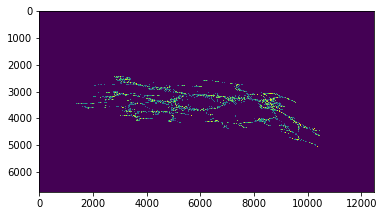

In [23]:
plt.imshow(100*skeleton)

# import NMJ coordinates

In [42]:
nmj = np.zeros((6736,12482),dtype = "uint8")

In [26]:
cd E:\Siyan Zhou\mask\nmj

E:\Siyan Zhou\mask\nmj


In [33]:
a = np.loadtxt('nmj.txt')

In [35]:
a.shape

(260, 3)

# overlap

In [57]:
for i in tqdm(range(260)):
    x = math.floor(a[i][1]/32)
    y = math.floor(a[i][0]/32)
    nmj[x-30:x+30,y-30:y+30]=1

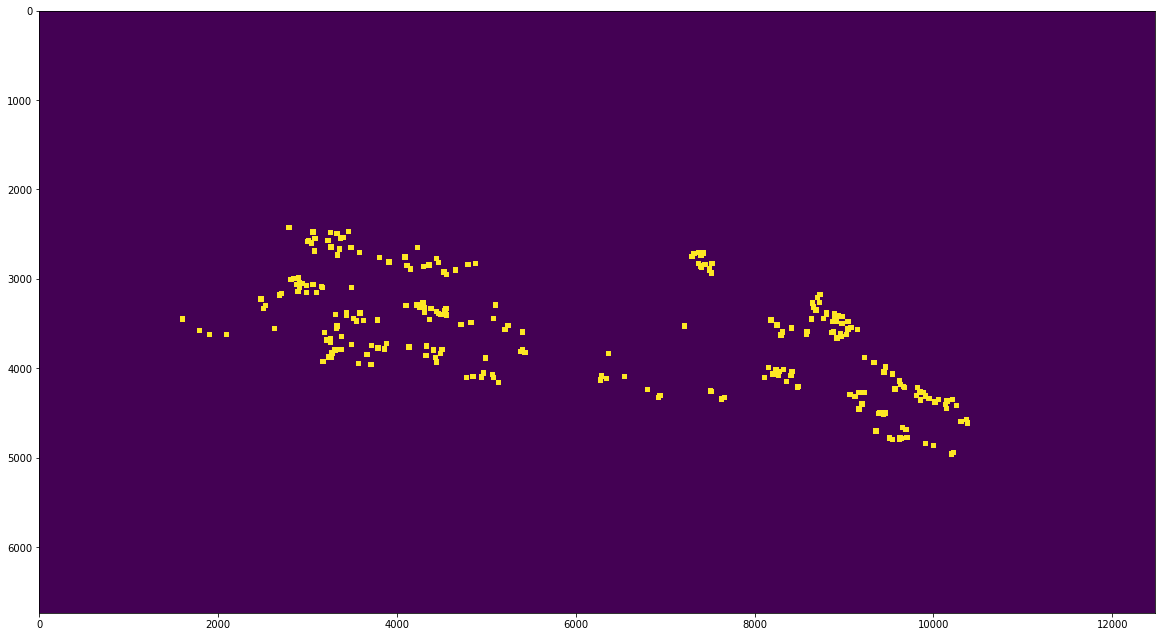

In [58]:
fig,ax = plt.subplots(1,1,figsize = (20,20))
ax.imshow(100*nmj)

In [59]:
cd E:\Siyan Zhou\mask\with_optical_image_whole

E:\Siyan Zhou\mask\with_optical_image_whole


In [60]:
f = Image.open("top_view_gamma.png")

In [61]:
im = np.asarray(f)

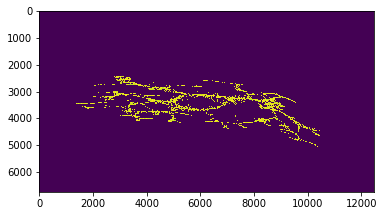

In [62]:
plt.imshow(im)

In [63]:
merge = np.zeros((nmj.shape[0],nmj.shape[1],3))

In [71]:
merge[:,:,2]=nmj*255
merge[:,:,1]=im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


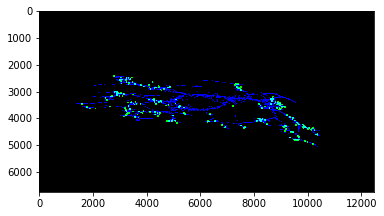

In [65]:
plt.imshow(merge)

In [72]:
cv2.imwrite('merge.png',merge)

True

In [56]:
scipy.misc.imsave('nmj.png', 100*nmj)

C:\Users\Harvard\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
